This Jupyter notebook serves as a practical complement to our paper, "Statistical Insights into Spatial Patterns: A Panorama About Lacunarity."

We also provide an R code implementation at:
https://github.com/erveton/Lacunarity_different_sizes_of_boxes

#Clique here to start

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import time

# Main code

In [ ]:
def calculate_lacunarity(matrix, box_size):
    """Calculate lacunarity for a given box size"""
    counts = []
    for i in range(matrix.shape[0] - box_size + 1):
        for j in range(matrix.shape[1] - box_size + 1):
            window = matrix[i:i+box_size, j:j+box_size]
            zero_count = np.sum(window == 0)
            counts.append(zero_count)

    counts = np.array(counts)
    if len(counts) == 0:
        return np.nan

    M1 = np.mean(counts)
    M2 = np.mean(counts**2)

    if M1 == 0:
        return np.inf  # Handle division by zero for p=0 case

    return M2 / (M1**2)

In [ ]:
def generate_image_pattern(size_multiplier=12):
    padraoMatrix = np.asarray(
        [[1,1,0,1,1,1,0,1,0,1,1,0],
         [0,0,0,0,0,1,0,0,0,1,1,1],
         [0,1,0,1,1,1,1,1,0,1,1,0],
         [1,0,1,1,1,0,0,0,0,0,0,0],
         [1,1,0,1,0,1,0,0,1,1,0,0],
         [0,1,0,1,1,0,0,1,0,0,1,0],
         [0,0,0,0,0,1,1,1,1,1,1,1],
         [0,1,1,0,0,0,1,1,1,1,0,0],
         [0,1,1,1,0,1,1,0,1,0,0,1],
         [0,1,0,0,0,0,0,0,0,1,1,1],
         [0,1,0,1,1,1,0,1,1,0,1,0],
         [0,1,0,0,0,1,0,1,1,1,0,1]])

    surf = np.zeros((12 * size_multiplier, 12 * size_multiplier), dtype=int)

    for y in range(padraoMatrix.shape[0]):
        for x in range(padraoMatrix.shape[1]):
            if padraoMatrix[y,x] == 1:
                surf[size_multiplier*y:size_multiplier*(y+1), size_multiplier*x:size_multiplier*(x+1)] = 1
    return surf

# Generate the surface image
# For 144x144 image, size_multiplier = 12
surf = generate_image_pattern(size_multiplier=12)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Generate the surface image (144x144)
surf = generate_image_pattern(size_multiplier=12)

# Define box sizes to test
box_sizes_to_test = [1, 2, 4, 8, 16, 32, 64, 128]

# Analyze lacunarity
results = {'box_size': [], 'lacunarity': []}

start_time = time.time()

for box_size in box_sizes_to_test:
    if box_size > min(surf.shape):
        continue  # Skip box sizes larger than the matrix

    lacunarity = calculate_lacunarity(surf, box_size)

    if not np.isnan(lacunarity):
        results['box_size'].append(box_size)
        results['lacunarity'].append(lacunarity)

end_time = time.time()
print(f"Analysis took: {end_time - start_time:.4f} seconds")

# Convert to log scale for plotting
log_box_sizes = np.log(results['box_size'])
log_lacunarity = np.log(results['lacunarity'])


Analysis took: 0.8108 seconds


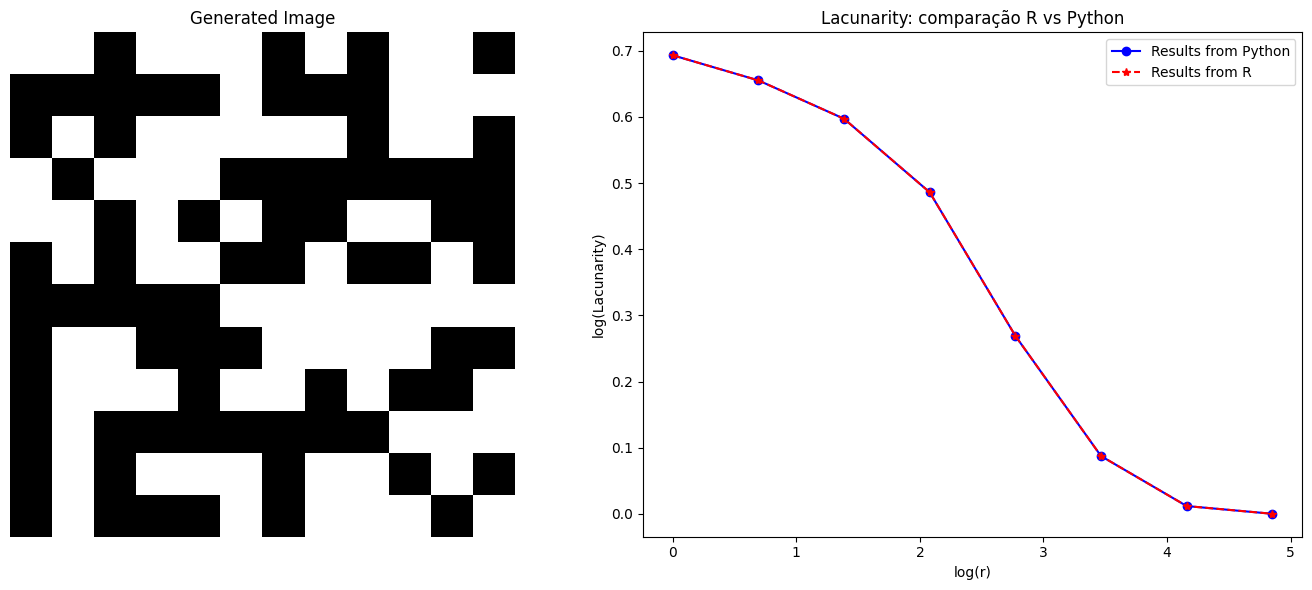

In [ ]:
# --- Resultados do R - Pinheiro ---
arr_N = np.array( [1,2,4,8,16,32,64,128] )
arr_lac = np.array( [2,1.92549118981736,1.81702012511167,1.62590490074514,1.30880314406664,1.09138264611069,1.01201196357609,1.0002523927586] )

# Calculate log values for Pinheiro results
log_arr_N = np.log(arr_N)
log_arr_lac = np.log(arr_lac)

# --- Plotting ---
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot the generated image
axs[0].imshow(surf, interpolation="none", cmap="gray")
axs[0].set_title("Generated Image")
axs[0].axis('off')




# Plot results
axs[1].plot(log_box_sizes, log_lacunarity, 'bo-', label='Results from Python')
axs[1].plot(log_arr_N, log_arr_lac, 'r*--', label='Results from R')

axs[1].set_title("Lacunarity: comparação R vs Python")
axs[1].set_xlabel('log(r)')
axs[1].set_ylabel('log(Lacunarity)')


axs[1].legend()
plt.tight_layout()



#Minimal Example

##1

--- Case 1: v=1 (Chessboard pattern) ---
--- Case 2: v=0 (Diagonal pattern) ---

--- Summary ---


,Case,Estimated Lacunarity,Theoretical Lacunarity
0,v=1 (Chessboard),1.00,1.00
1,v=0 (Diagonal),1.04,1.04


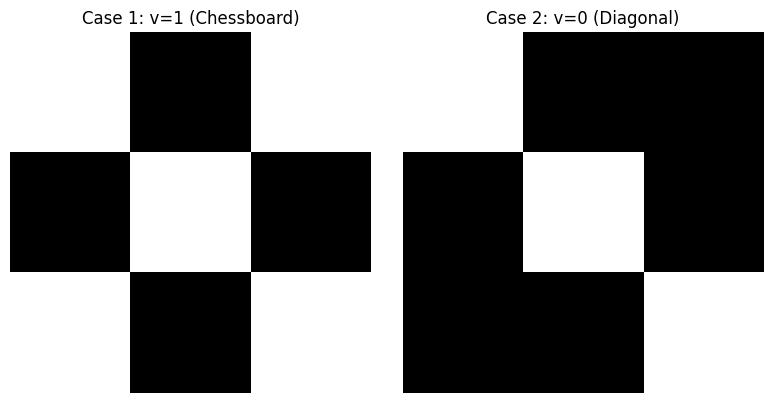

In [ ]:

# --- Case 1: v=1 (Chessboard pattern) ---
print("--- Case 1: v=1 (Chessboard pattern) ---")
img_v1 = np.array([
    [1, 0, 1],
    [0, 1, 0],
    [1, 0, 1]
], dtype=int)

# Calculate lacunarity for box size 2
lac_v1 = calculate_lacunarity(img_v1, 2)
theoretical_lac_v1 = 1.0

# --- Case 2: v=0 (Diagonal pattern) ---
print("--- Case 2: v=0 (Diagonal pattern) ---")
img_v0 = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
], dtype=int)

# Calculate lacunarity for box size 2
lac_v0 = calculate_lacunarity(img_v0, 2)
theoretical_lac_v0 = 6.5 / (2.5**2)  # = 1.04

# --- Plotting ---
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(img_v1, cmap='gray', interpolation='none')
axs[0].set_title('Case 1: v=1 (Chessboard)')
axs[0].axis('off')

axs[1].imshow(img_v0, cmap='gray', interpolation='none')
axs[1].set_title('Case 2: v=0 (Diagonal)')
axs[1].axis('off')
plt.tight_layout()

# --- Results Summary ---
print("\n--- Summary ---")
summary_data = {
    "Case": [" v=1 (Chessboard)", "v=0 (Diagonal) "],
    "Estimated Lacunarity": [lac_v1, lac_v0],
    "Theoretical Lacunarity": [theoretical_lac_v1, theoretical_lac_v0]
}
summary_df = pd.DataFrame(summary_data)
display(summary_df)



##2

<>:111: SyntaxWarning: invalid escape sequence '\l'
<>:112: SyntaxWarning: invalid escape sequence '\l'
<>:119: SyntaxWarning: invalid escape sequence '\l'
<>:120: SyntaxWarning: invalid escape sequence '\l'
<>:111: SyntaxWarning: invalid escape sequence '\l'
<>:112: SyntaxWarning: invalid escape sequence '\l'
<>:119: SyntaxWarning: invalid escape sequence '\l'
<>:120: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-619331491.py:111: SyntaxWarning: invalid escape sequence '\l'
  axs[1, 0].set_xlabel("$\log(1/m)$")
/tmp/ipython-input-619331491.py:112: SyntaxWarning: invalid escape sequence '\l'
  axs[1, 0].set_ylabel("$\log(N)$")
/tmp/ipython-input-619331491.py:119: SyntaxWarning: invalid escape sequence '\l'
  axs[1, 1].set_xlabel("$\log(m)$")
/tmp/ipython-input-619331491.py:120: SyntaxWarning: invalid escape sequence '\l'
  axs[1, 1].set_ylabel('$\log(\Lambda)$') #()


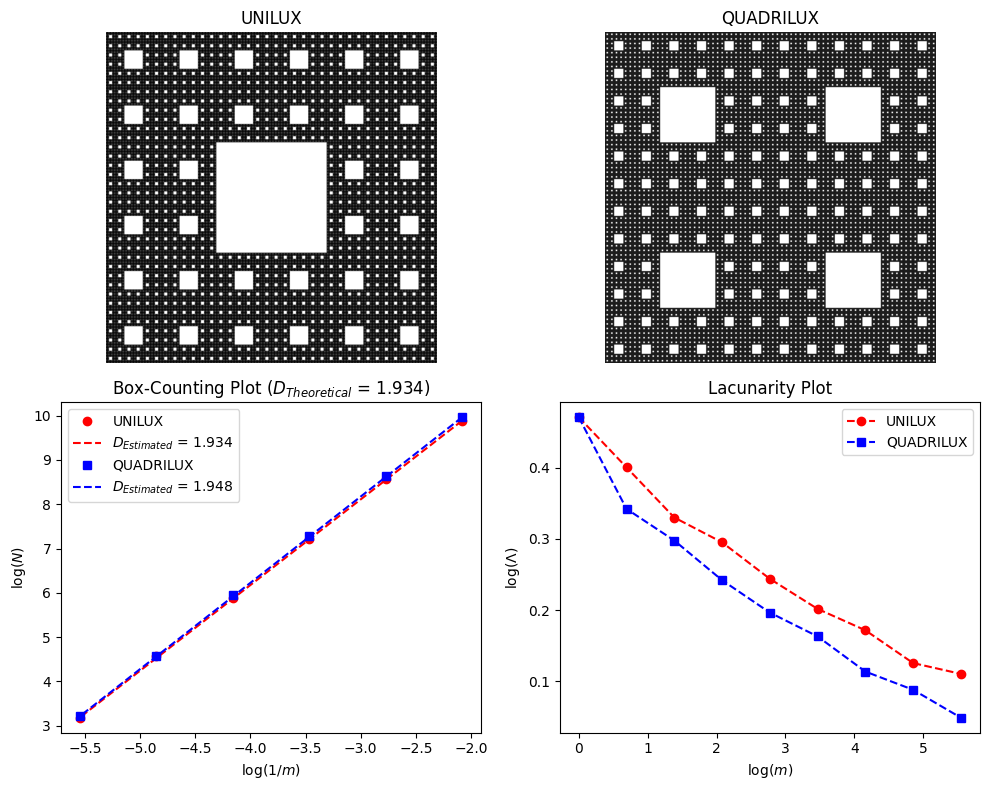

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def draw_serp_array(n, rules):
    """Generates fractal array using replacement rules."""
    m = np.array([[1]])
    for _ in range(n):
        rows = []
        for i in range(m.shape[0]):
            row_chunks = [rules[m[i, j]] for j in range(m.shape[1])]
            rows.append(np.hstack(row_chunks))
        m = np.vstack(rows)
    return m

def box_count(Z):
    """Estimates fractal dimension using box-counting method."""
    Z = (Z > 0).astype(int)
    box_sizes = 2**np.arange(3,9,1)
    counts = []

    for b in box_sizes:
        if b > min(Z.shape):
            break
        S = (Z.shape[0]//b, Z.shape[1]//b)
        reshaped = Z[:S[0]*b, :S[1]*b].reshape(S[0], b, S[1], b)
        blocks = reshaped.max(axis=(1,3))
        counts.append(blocks.sum())

    box_sizes = box_sizes[:len(counts)]
    log_inv = np.log(1/box_sizes)
    log_counts = np.log(counts)
    slope = linregress(log_inv, log_counts)[0]
    return slope, (log_inv, log_counts)

def calculate_lacunarity(matrix, box_size):
    """
    Calculate lacunarity for a given box size using the sliding box algorithm.
    Lacunarity quantifies the distribution of gaps within a fractal.
    """
    # Ensure the matrix is binary
    matrix = (matrix > 0).astype(int)

    counts = []
    # Slide a window of 'box_size' across the matrix
    for i in range(matrix.shape[0] - box_size + 1):
        for j in range(matrix.shape[1] - box_size + 1):
            window = matrix[i:i+box_size, j:j+box_size]
            # Count the number of '1's in the window
            counts.append(np.sum(window))

    counts = np.array(counts)

    # Calculate the first and second moments
    if len(counts) == 0:
        return np.nan
    M1 = np.mean(counts)
    M2 = np.mean(counts**2)
    if M1 == 0:
        return np.inf
    # Lacunarity is the ratio of the second moment to the square of the first moment
    return M2 / (M1**2)

# Define fractal rules
rules_dual_hole = {
    0: np.zeros((6, 6), dtype=int),
    1: np.array([[1,1,1,1,1,1],[1,1,1,1,1,1],[1,1,0,0,1,1],[1,1,0,0,1,1],[1,1,1,1,1,1],[1,1,1,1,1,1]], dtype=int)
}

rules_four_hole = {
    0: np.zeros((6, 6), dtype=int),
    1: np.array([[1,1,1,1,1,1],[1,0,1,1,0,1],[1,1,1,1,1,1],[1,1,1,1,1,1],[1,0,1,1,0,1],[1,1,1,1,1,1]], dtype=int)
}

# Generate fractals
fractal_dual_hole = draw_serp_array(4, rules_dual_hole)
fractal_four_hole = draw_serp_array(4, rules_four_hole)

# Calculate fractal dimensions
dim_dual_hole, (x1, y1) = box_count(fractal_dual_hole)
dim_four_hole, (x2, y2) = box_count(fractal_four_hole)
theoretical_dim = np.log(32)/np.log(6)

# Calculate lacunarity for various box sizes
box_sizes_lac = np.array([1, 2, 4, 8, 16, 32, 64, 128, 256])
lacunarity_dual = [calculate_lacunarity(fractal_dual_hole, b) for b in box_sizes_lac]
lacunarity_four = [calculate_lacunarity(fractal_four_hole, b) for b in box_sizes_lac]


# --- Create the 2x2 plot grid ---
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Top-Left: Square fractal image

axs[0, 0].imshow(fractal_dual_hole, cmap='binary')
axs[0, 0].set_title('UNILUX')
axs[0, 0].axis('off')

# Top-Right: Tetra fractal image
axs[0, 1].imshow(fractal_four_hole, cmap='binary')
axs[0, 1].set_title('QUADRILUX')
axs[0, 1].axis('off')

# Bottom-Left: Both box-counting plots
axs[1, 0].plot(x1, y1, 'ro', label='UNILUX')
axs[1, 0].plot(x1, dim_dual_hole * x1 + y1[0] - dim_dual_hole * x1[0], 'r--', label=r"$D_{Estimated}$ = %1.3f"%dim_dual_hole)
axs[1, 0].plot(x2, y2, 'bs', label='QUADRILUX')
axs[1, 0].plot(x2, dim_four_hole * x2 + y2[0] - dim_four_hole * x2[0], 'b--', label=r"$D_{Estimated}$ = %1.3f"%dim_four_hole)
axs[1, 0].set_title(f'Box-Counting Plot ($D_{{Theoretical}}$ = {theoretical_dim:.3f})')
axs[1, 0].set_xlabel("$\log(1/m)$")
axs[1, 0].set_ylabel("$\log(N)$")
axs[1, 0].legend()

# Bottom-Right: Both lacunarity plots
axs[1, 1].plot(np.log(box_sizes_lac), np.log(lacunarity_dual), 'ro--', label='UNILUX')
axs[1, 1].plot(np.log(box_sizes_lac), np.log(lacunarity_four), 'bs--', label='QUADRILUX')
axs[1, 1].set_title('Lacunarity Plot')
axs[1, 1].set_xlabel("$\log(m)$")
axs[1, 1].set_ylabel('$\log(\Lambda)$') #()
axs[1, 1].legend()

plt.tight_layout()


#Fig3 of the paper

In [ ]:
def sierpinski_matrix(n):
    """
    Cria uma matriz representando o Tapete de Sierpinski de ordem n, com 1s
    no lugar dos 0s do padrão original (invertido).

    Args:
        n: A ordem do tapete de Sierpinski (um inteiro não negativo).

    Returns:
        Uma matriz NumPy representando o tapete de Sierpinski com 1s no padrão.
    """
    if n == 0:
        # Originalmente retornava [[1]], agora retorna [[1]] para o centro (invertido)
        return np.array([[1]])
    else:
        smaller_sierpinski = sierpinski_matrix(n - 1)

        # Cria uma matriz maior preenchida com zeros (o fundo)
        size = 3**(n)
        matrix = np.zeros((size, size), dtype=int)

        # Preenche a matriz com base na matriz menor, colocando 1s onde há o padrão
        for i in range(3):
            for j in range(3):
                if i == 1 and j == 1:
                    # O centro permanece preenchido com zeros (o fundo)
                    continue
                else:
                    # As áreas não centrais recebem o padrão de 1s da matriz menor
                    matrix[i*3**(n-1):(i+1)*3**(n-1), j*3**(n-1):(j+1)*3**(n-1)] = smaller_sierpinski
        return matrix

In [ ]:
def criar_matriz_alternada(linhas_0, linhas_1, colunas):
    """
    Cria uma matriz com linhas alternadas de 0s e 1s.

    Args:
      linhas_0: Número de linhas com zeros.
      linhas_1: Número de linhas com uns.
      colunas: Número de colunas em cada linha.

    Returns:
      Uma matriz (lista de listas) com os padrões desejados.
    """
    matriz = []
    for i in range(linhas_0):
        matriz.append([0] * colunas)
    for i in range(linhas_1):
        matriz.append([1] * colunas)
    for i in range(linhas_0):
        matriz.append([0] * colunas)
    for i in range(linhas_1):
        matriz.append([1] * colunas)
    for i in range(linhas_0):
        matriz.append([0] * colunas)
    for i in range(linhas_1):
        matriz.append([1] * colunas)
    return matriz

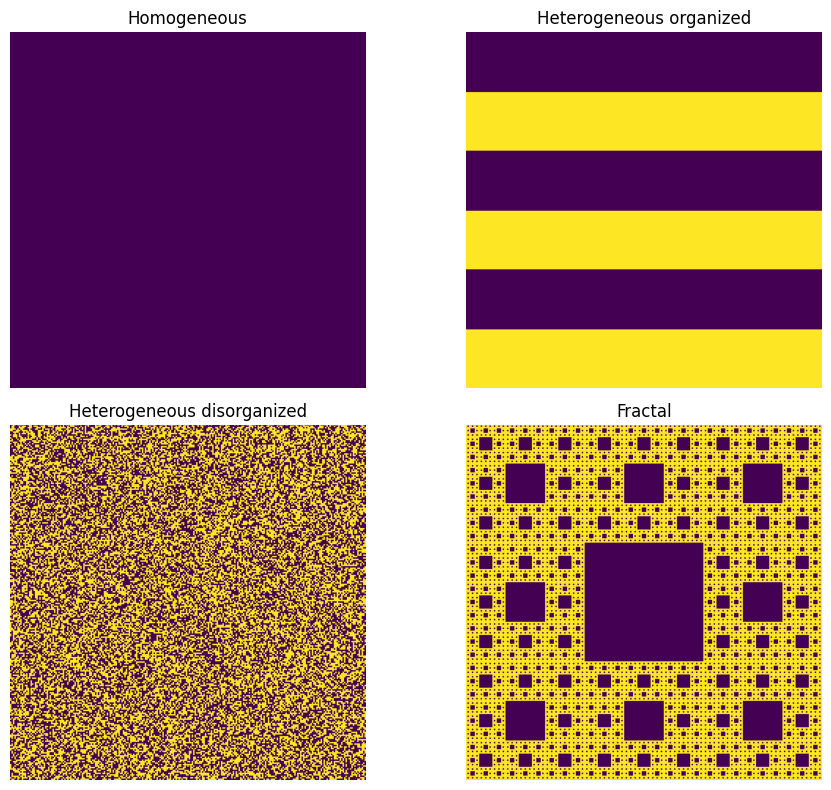

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Matriz homogenea
n = m = 243
mat_homogenea = [[0 for _ in range(m)] for _ in range(n)]

# Convert the list of lists to a NumPy array
mat_homogenea = np.array(mat_homogenea)

# Use a valid colormap name like 'viridis'
# The imshow function in the notebook was missing the axis object to plot on.
# It was calling the global plt.imshow instead of axes[0, 0].imshow() or similar.
# Also, ensure the colormap is applied to the correct axis.
axes[0, 0].imshow(mat_homogenea, cmap='viridis')
axes[0, 0].set_title('Homogeneous') # Add a title for clarity
axes[0, 0].axis('off') # Turn off axes for image plot

# matriz heterogenea organizada
# Exemplo de uso
linhas_0 = 41
linhas_1 = 40
colunas = 243
mat_heterogenea_np = np.array(criar_matriz_alternada(linhas_0, linhas_1, colunas))

# Plot the heterogeneous matrix on another subplot axis
axes[0, 1].imshow(mat_heterogenea_np, cmap='viridis') # Using 'gray' colormap for binary data
axes[0, 1].set_title('Heterogeneous organized')
axes[0, 1].axis('off')


# Note: The original R rep call 'z = rep(vec,50,each =2048)' as written
# would not directly produce a 256x256 matrix. The above code
# provides a plausible interpretation for creating a heterogeneous matrix

#gera uma matriz heterogenea desorganizada
# Replace R's runif with numpy.random.uniform
# Replace R's ifelse with numpy.where

# Heterogenea desorganizada

mat_aleatoria = np.random.choice([0, 1], size=(m, n))
axes[1, 0].imshow(mat_aleatoria, cmap='viridis')
axes[1, 0].set_title('Heterogeneous disorganized')
axes[1, 0].axis('off')

# Fractal

sierpinski = sierpinski_matrix(5)
axes[1, 1].imshow(sierpinski, cmap='viridis')
axes[1, 1].set_title('Fractal')
axes[1, 1].axis('off')

plt.tight_layout() # Adjust layout to prevent overlap



In [ ]:
print(sierpinski.shape)
print(mat_homogenea.shape)
print(mat_heterogenea_np.shape)
print(mat_aleatoria.shape)

(243, 243)
(243, 243)
(243, 243)
(243, 243)


<>:43: SyntaxWarning: invalid escape sequence '\l'
<>:44: SyntaxWarning: invalid escape sequence '\l'
<>:43: SyntaxWarning: invalid escape sequence '\l'
<>:44: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-741640653.py:43: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\log(m)$', fontsize=14)
/tmp/ipython-input-741640653.py:44: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel('$\log(\Lambda)$',fontsize=14)


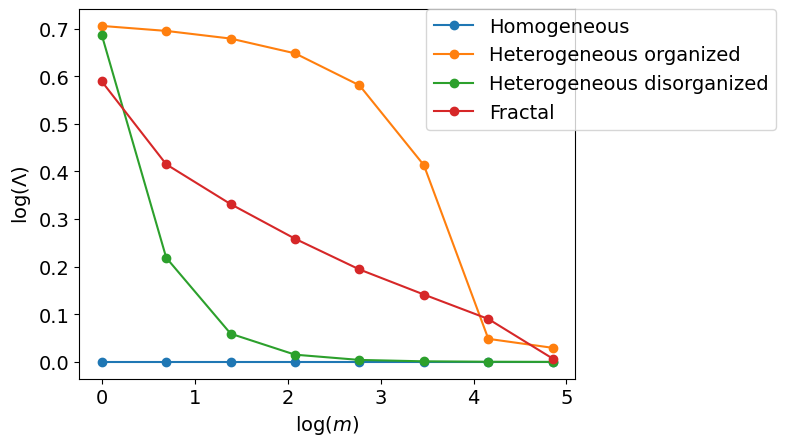

In [ ]:
# Define the box sizes for analysis
box_sizes_to_test = [1, 2, 4, 8, 16, 32, 64, 128]

# Calculando as curvas de lacunaridade
lo_v3_homo, la_v3_homo = [], []
lo_v3_het, la_v3_het = [], []
lo_v3_aleat, la_v3_aleat = [], []
lo_v3_fractal, la_v3_fractal = [], []

for box_size in box_sizes_to_test:
    if box_size > min(mat_homogenea.shape):
        continue # Skip box sizes larger than the matrix

    # Calculate lacunarity for each matrix and box size
    lac_homo = calculate_lacunarity(mat_homogenea == 0, box_size)
    lac_het = calculate_lacunarity(mat_heterogenea_np, box_size)
    lac_aleat = calculate_lacunarity(mat_aleatoria, box_size)
    lac_fractal = calculate_lacunarity(sierpinski, box_size)

    # Append results if not NaN
    if not np.isnan(lac_homo):
        lo_v3_homo.append(np.log(box_size))
        la_v3_homo.append(np.log(lac_homo))

    if not np.isnan(lac_het):
        lo_v3_het.append(np.log(box_size))
        la_v3_het.append(np.log(lac_het))

    if not np.isnan(lac_aleat):
        lo_v3_aleat.append(np.log(box_size))
        la_v3_aleat.append(np.log(lac_aleat))

    if not np.isnan(lac_fractal):
        lo_v3_fractal.append(np.log(box_size))
        la_v3_fractal.append(np.log(lac_fractal))


# Plotar resultados
plt.plot(lo_v3_homo, la_v3_homo, 'o-', label='Homogeneous')
plt.plot(lo_v3_het, la_v3_het, 'o-', label='Heterogeneous organized')
plt.plot(lo_v3_aleat, la_v3_aleat, 'o-', label='Heterogeneous disorganized')
plt.plot(lo_v3_fractal, la_v3_fractal, 'o-', label='Fractal')
plt.xlabel('$\log(m)$', fontsize=14)
plt.ylabel('$\log(\Lambda)$',fontsize=14)
plt.legend(fontsize=14, bbox_to_anchor=(0.7, 1), loc='upper left', borderaxespad=0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);